# Traffic Signal Data Analysis Using Python

## Introduction

This project analyzes traffic signal data to identify peak hours,
congestion patterns, and high-load intersections using Python.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [11]:
df.head()

,Date,Time,Signal_ID,Vehicles,Light_Status,DateTime,Hour,Day
0,2025-01-01,08:00,S1,120,Red,2025-01-01 08:00:00,8,Wednesday
1,2025-01-01,12:00,S2,90,Green,2025-01-01 12:00:00,12,Wednesday
2,2025-01-01,18:00,S3,150,Red,2025-01-01 18:00:00,18,Wednesday
3,2025-01-02,09:00,S1,130,Green,2025-01-02 09:00:00,9,Thursday
4,2025-01-02,14:00,S2,100,Red,2025-01-02 14:00:00,14,Thursday


In [3]:
data = {
    "Date": ["2025-01-01","2025-01-01","2025-01-01","2025-01-02","2025-01-02","2025-01-02"],
    "Time": ["08:00","12:00","18:00","09:00","14:00","20:00"],
    "Signal_ID": ["S1","S2","S3","S1","S2","S3"],
    "Vehicles": [120,90,150,130,100,160],
    "Light_Status": ["Red","Green","Red","Green","Red","Green"]
}

df = pd.DataFrame(data)

df

,Date,Time,Signal_ID,Vehicles,Light_Status
0,2025-01-01,08:00,S1,120,Red
1,2025-01-01,12:00,S2,90,Green
2,2025-01-01,18:00,S3,150,Red
3,2025-01-02,09:00,S1,130,Green
4,2025-01-02,14:00,S2,100,Red
5,2025-01-02,20:00,S3,160,Green


In [4]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          6 non-null      object
 1   Time          6 non-null      object
 2   Signal_ID     6 non-null      object
 3   Vehicles      6 non-null      int64 
 4   Light_Status  6 non-null      object
dtypes: int64(1), object(4)
memory usage: 372.0+ bytes


,Vehicles
count,6.000000
mean,125.000000
std,27.386128
min,90.000000
25%,105.000000
50%,125.000000
75%,145.000000
max,160.000000


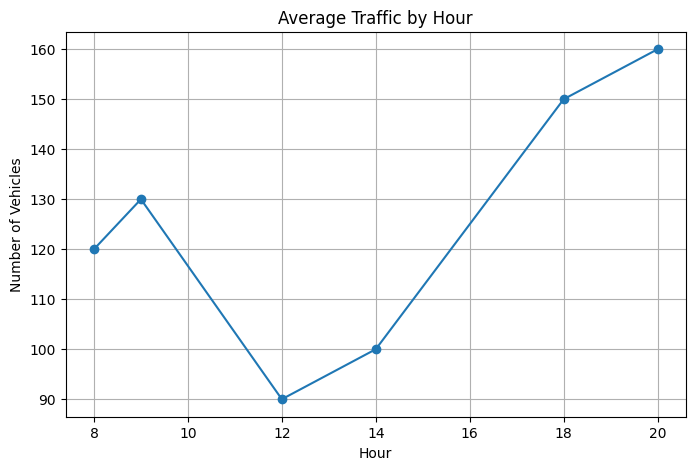

In [13]:
plt.figure(figsize=(8,5))

hourly = df.groupby("Hour")["Vehicles"].mean()

hourly.plot(marker="o")

plt.title("Average Traffic by Hour")
plt.xlabel("Hour")
plt.ylabel("Number of Vehicles")

plt.grid(True)
plt.show()

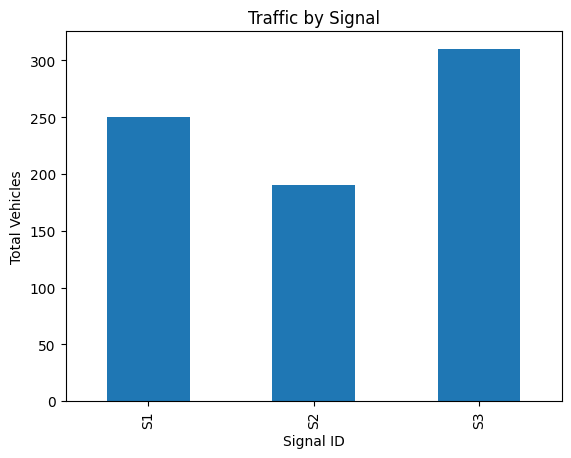

In [14]:
signal = df.groupby("Signal_ID")["Vehicles"].sum()

signal.plot(kind="bar")

plt.title("Traffic by Signal")
plt.xlabel("Signal ID")
plt.ylabel("Total Vehicles")

plt.show()

In [5]:
df["DateTime"] = pd.to_datetime(df["Date"] + " " + df["Time"])

df

,Date,Time,Signal_ID,Vehicles,Light_Status,DateTime
0,2025-01-01,08:00,S1,120,Red,2025-01-01 08:00:00
1,2025-01-01,12:00,S2,90,Green,2025-01-01 12:00:00
2,2025-01-01,18:00,S3,150,Red,2025-01-01 18:00:00
3,2025-01-02,09:00,S1,130,Green,2025-01-02 09:00:00
4,2025-01-02,14:00,S2,100,Red,2025-01-02 14:00:00
5,2025-01-02,20:00,S3,160,Green,2025-01-02 20:00:00


In [6]:
df["Hour"] = df["DateTime"].dt.hour
df["Day"] = df["DateTime"].dt.day_name()

df

,Date,Time,Signal_ID,Vehicles,Light_Status,DateTime,Hour,Day
0,2025-01-01,08:00,S1,120,Red,2025-01-01 08:00:00,8,Wednesday
1,2025-01-01,12:00,S2,90,Green,2025-01-01 12:00:00,12,Wednesday
2,2025-01-01,18:00,S3,150,Red,2025-01-01 18:00:00,18,Wednesday
3,2025-01-02,09:00,S1,130,Green,2025-01-02 09:00:00,9,Thursday
4,2025-01-02,14:00,S2,100,Red,2025-01-02 14:00:00,14,Thursday
5,2025-01-02,20:00,S3,160,Green,2025-01-02 20:00:00,20,Thursday


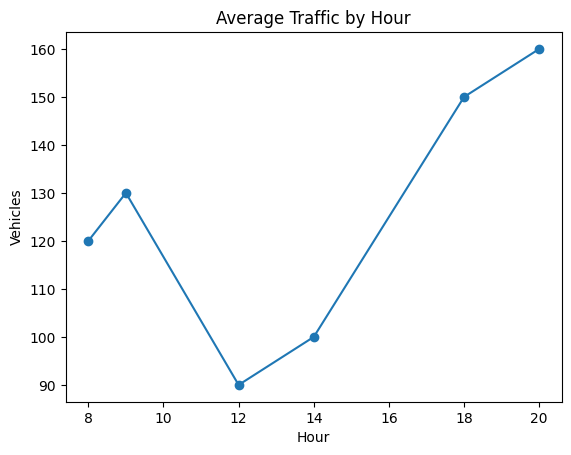

In [7]:
hourly = df.groupby("Hour")["Vehicles"].mean()

hourly.plot(kind="line", marker="o")
plt.title("Average Traffic by Hour")
plt.xlabel("Hour")
plt.ylabel("Vehicles")
plt.show()

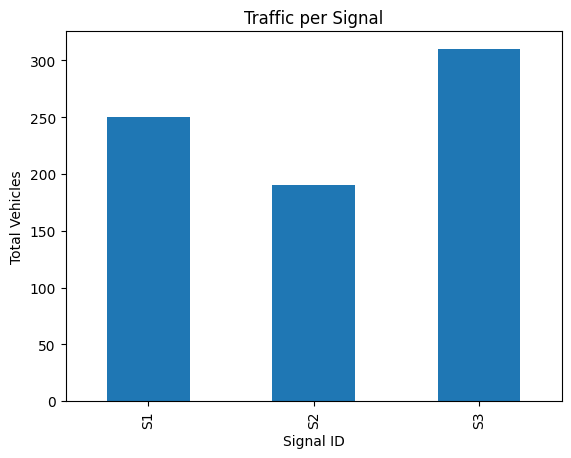

In [8]:
signal = df.groupby("Signal_ID")["Vehicles"].sum()

signal.plot(kind="bar")
plt.title("Traffic per Signal")
plt.xlabel("Signal ID")
plt.ylabel("Total Vehicles")
plt.show()

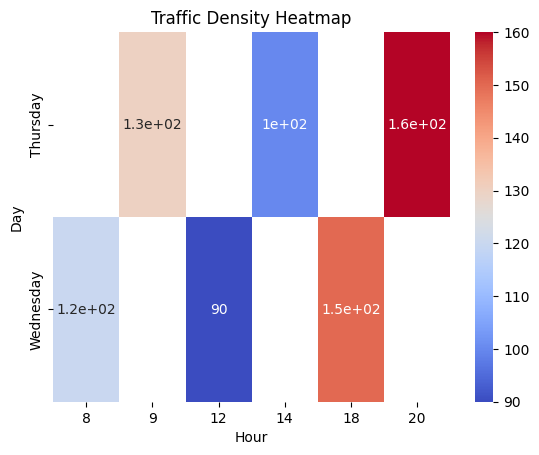

In [9]:
pivot = df.pivot_table(
    values="Vehicles",
    index="Day",
    columns="Hour",
    aggfunc="mean"
)

sns.heatmap(pivot, annot=True, cmap="coolwarm")
plt.title("Traffic Density Heatmap")
plt.show()

## Key Insights

1. Highest traffic is observed in evening hours (18:00–20:00).
2. Traffic is lowest around midday (12:00).
3. Signal S3 handles the maximum number of vehicles.
4. Morning and evening hours are peak periods.

## Conclusion

This project analyzed traffic signal data using Python and visualizations.
The results help identify peak congestion hours and high-load signals,
which can be used to optimize traffic management.
